<a href="https://colab.research.google.com/github/lilythomson13/finalproject/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3001 Final Project EDA
### Alysha Akhtar & Lily Thomson

#### Importing data from csv file

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('METABRIC_RNA_Mutation.csv')

<ipython-input-16-8916cf4dc094>:4: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('METABRIC_RNA_Mutation.csv')


#### Visualize and print info about dataframe

In [17]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(496), int64(7), object(190)
memory usage: 10.1+ MB


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,0,0,0,0,0,0,0,0,0


#### Conduct EDA of relevant clinical variables and gene expression data

count    1904.000000
mean       61.087054
std        12.978711
min        21.930000
25%        51.375000
50%        61.770000
75%        70.592500
max        96.290000
Name: age_at_diagnosis, dtype: float64


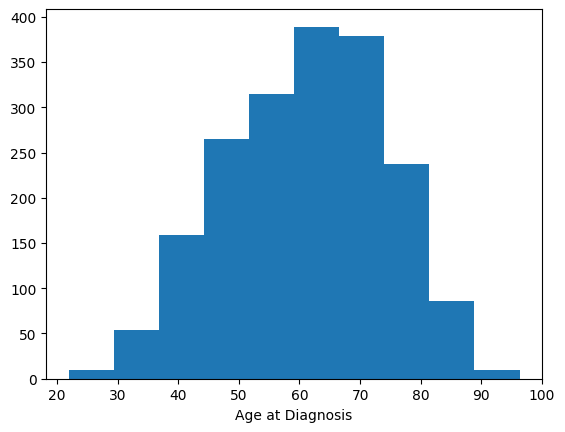

In [9]:
# EDA for patient age at diagnosis
print(df['age_at_diagnosis'].describe())
df['age_at_diagnosis'].hist(grid=False)
plt.xlabel("Age at Diagnosis")
plt.show()

count    1904.000000
mean      125.121324
std        76.334148
min         0.000000
25%        60.825000
50%       115.616667
75%       184.716667
max       355.200000
Name: overall_survival_months, dtype: float64


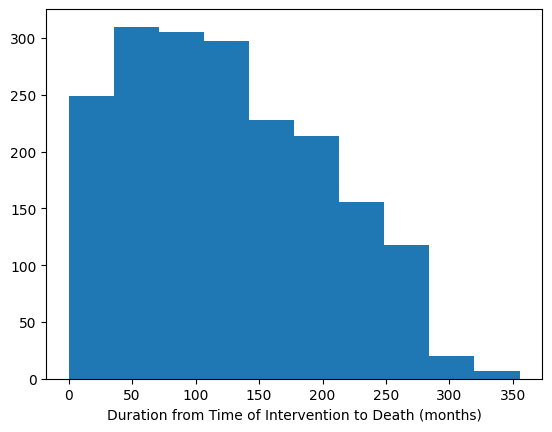

In [11]:
# EDA for overall survival in months
print(df['overall_survival_months'].describe())
df['overall_survival_months'].hist(grid=False)
plt.xlabel("Duration from Time of Intervention to Death (months)")
plt.show()

count    1884.000000
mean       26.238726
std        15.160976
min         1.000000
25%        17.000000
50%        23.000000
75%        30.000000
max       182.000000
Name: tumor_size, dtype: float64


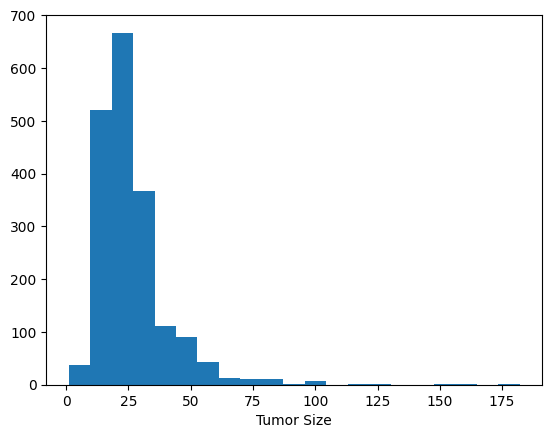

In [18]:
# EDA for tumor size
print(df['tumor_size'].describe())
df['tumor_size'].hist(bins = 21, grid=False)
plt.xlabel("Tumor Size")
plt.show()

count    1859.000000
mean        5.697687
std         4.058778
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        80.000000
Name: mutation_count, dtype: float64


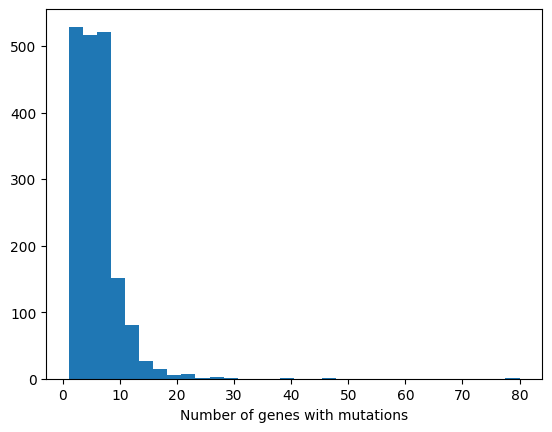

In [15]:
# EDA for mutation count
print(df['mutation_count'].describe())
df['mutation_count'].hist(bins = 32, grid=False)
plt.xlabel("Number of genes with mutations")
plt.show()

count    1.904000e+03
mean    -4.201681e-07
std      1.000262e+00
min     -2.783500e+00
25%     -6.994750e-01
50%     -5.820000e-02
75%      6.290000e-01
max      3.737900e+00
Name: brca2, dtype: float64


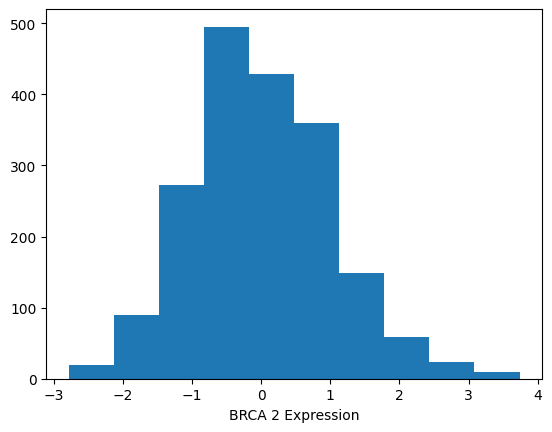

In [28]:
# EDA of BRCA2 expression
print(df['brca2'].describe())
df['brca2'].hist(grid=False)
plt.xlabel("BRCA 2 Expression")
plt.show()

count    1904.000000
mean        0.000002
std         1.000263
min        -3.323700
25%        -0.458600
50%         0.115550
75%         0.649800
max         2.820900
Name: cdh1, dtype: float64


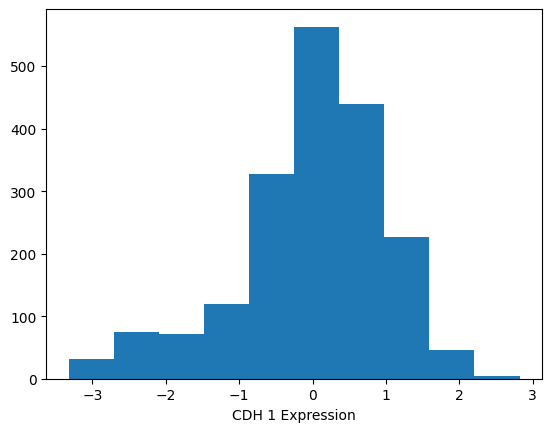

In [29]:
# EDA of CDH1 Expression
print(df['cdh1'].describe())
df['cdh1'].hist(grid=False)
plt.xlabel("CDH 1 Expression")
plt.show()

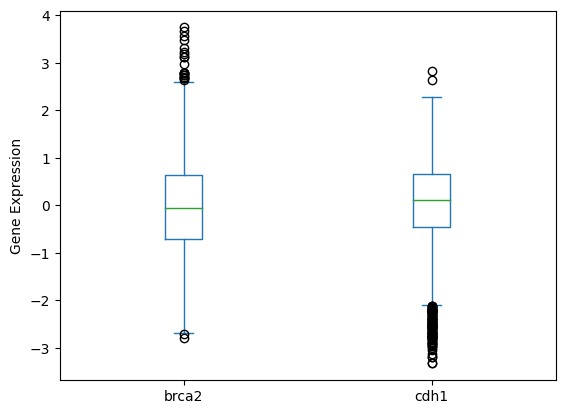

In [30]:
# Boxplot of BRCA2 and CDH1 Expression
df[['brca2', 'cdh1']].plot.box()
plt.ylabel("Gene Expression")
plt.show()

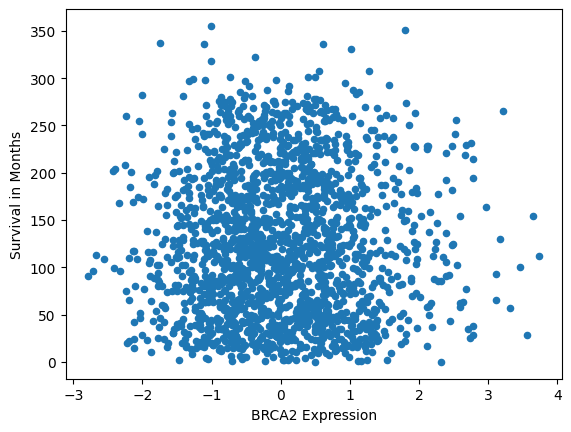

In [34]:
# scatterplot of relationship between BRCA2 expression and survival in months
df.plot.scatter(x='brca2', y='overall_survival_months')

plt.xlabel('BRCA2 Expression')
plt.ylabel('Survival in Months')

plt.show()

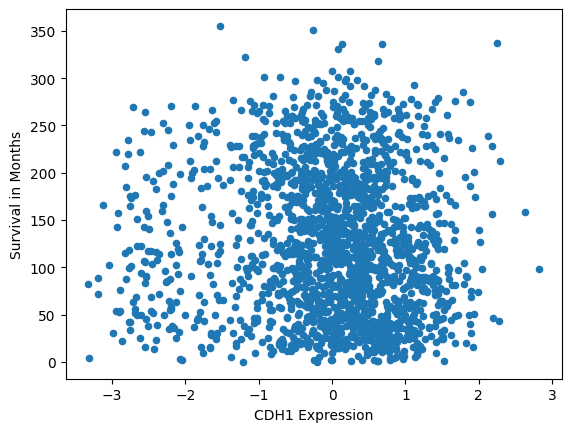

In [35]:
# scatterplot of relationship between CDH1 expression and survival in months
df.plot.scatter(x='cdh1', y='overall_survival_months')

plt.xlabel('CDH1 Expression')
plt.ylabel('Survival in Months')

plt.show()

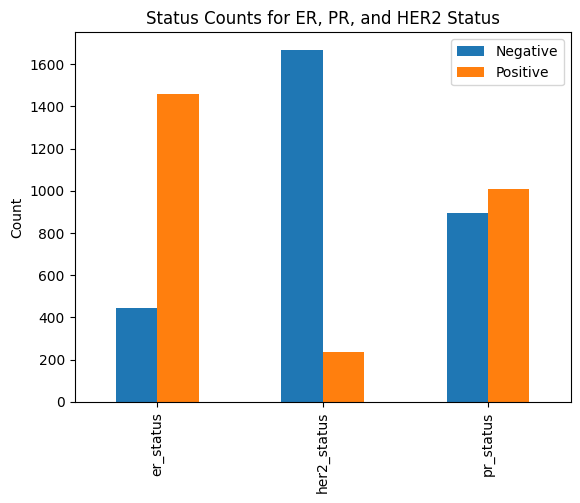

In [33]:
# EDA of ER, PR, and HER2 status

status_counts = df[['er_status', 'her2_status', 'pr_status']].apply(lambda col: col.value_counts())

status_counts.T.plot(kind='bar')

plt.ylabel('Count')
plt.title('Status Counts for ER, PR, and HER2 Status')

plt.show()